In [2]:
import sys
sys.path.append('../')

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
%load_ext autoreload
%autoreload 2
from marcia import Cosmology
from marcia import Data
from marcia import Likelihood
from marcia import Sampler
from marcia import Kernels

# Validate Cosmology

In [5]:
# TO perfrom valiadtion with a simple $\Lambda$CDM model here
model = ['LCDM']
cParIni = [70.0, 0.3] 

theory = Cosmology(model,cParIni)

z_min = 0.001
z_max = 10.0

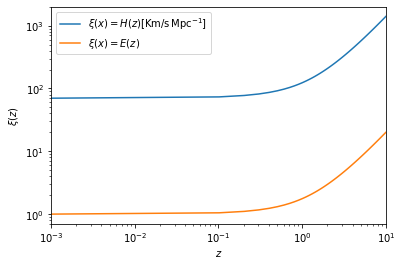

In [6]:
zlist = np.linspace(z_min, z_max, 100)

plt.xlim(z_min,z_max)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$z$')
plt.ylabel(r'$\xi(z)$')

plt.plot(zlist, theory.hubble_rate(zlist), label = r'$\xi(x) = H(z) [\rm{Km/s\, Mpc^{-1}}]$')
plt.plot(zlist, theory.hubble_rate(zlist)/theory.H_0, label = r'$\xi(x) = E(z)$')

plt.gca().legend()

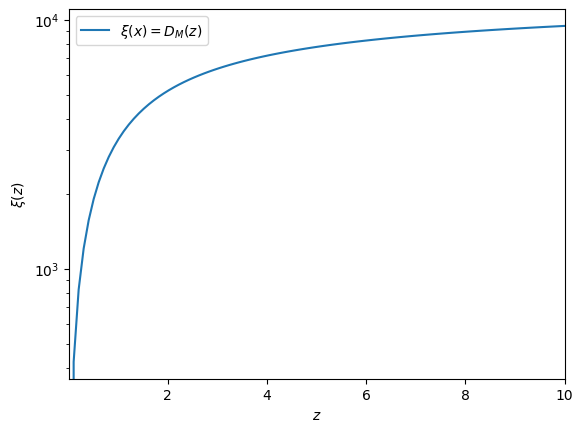

In [65]:
plt.xlim(z_min,z_max)
plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$\xi(z)$')

plt.plot(zlist, theory.transverse_distance(zlist), label = r'$\xi(x) = D_M(z)$')

plt.gca().legend()

In [51]:
# SOund horizon for the  current cosmology 
print('The sound horizon in MPc is : ' + str(round(theory.sound_horizon(), 2)))

The sound horizon in MPc is : 146.61
